https://machine-learning-python.kspax.io/application/svr

# 引入 - 用c1.csv 展示



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive  
drive.mount('/content/gdrive')  
# 他會出現個連結，點擊後複製驗證碼貼回下方儲存格就驗證成功了   
%cd /content/gdrive/"My Drive"/"Colab Notebooks"  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [5]:
!pwd

/content/gdrive/My Drive/Colab Notebooks


In [6]:
%cd CCPP

/content/gdrive/My Drive/Colab Notebooks/CCPP


In [0]:
# read_csv里面的参数是csv在你电脑上的路径，此处csv文件放在notebook运行目录下面的CCPP目录里
data = pd.read_csv('c1_m.csv') 

# 資料模樣 - 主要欄位無缺值



In [8]:
data.info()
#stage rpm kg無幫助,其他都1434無缺值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          1434 non-null   object 
 1   Stage         975 non-null    object 
 2   PI850PV       1434 non-null   float64
 3   V1_PI850PV    1434 non-null   float64
 4   TIC850PV      1434 non-null   float64
 5   V2_TIC850PV   1434 non-null   float64
 6   TIC850SV      1434 non-null   int64  
 7   V3_TIC850SV   1434 non-null   int64  
 8   TIC851PV      1434 non-null   float64
 9   V4_TIC851PV   1434 non-null   float64
 10  TIC8502PV     1434 non-null   float64
 11  V5_TIC8502PV  1434 non-null   float64
 12  TIC8501PV     1434 non-null   float64
 13  V6_TIC8501PV  1434 non-null   float64
 14  X202ACPV      1434 non-null   float64
 15  V7_X202ACPV   1434 non-null   float64
 16  RPM           1434 non-null   float64
 17  V8_RPM        1434 non-null   float64
 18  KG            4 non-null    

In [9]:
data.describe()

,PI850PV,V1_PI850PV,TIC850PV,V2_TIC850PV,TIC850SV,V3_TIC850SV,TIC851PV,V4_TIC851PV,TIC8502PV,V5_TIC8502PV,TIC8501PV,V6_TIC8501PV,X202ACPV,V7_X202ACPV,RPM,V8_RPM,KG
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.0,1434.0,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,4.000000
mean,2.763459,-0.000672,38.832771,-0.024140,65.0,0.0,20.494286,-0.016513,21.274411,-0.016425,39.173359,-0.024515,308.580918,-0.101952,59.556416,-0.002092,250.000000
std,0.928390,0.100814,11.852682,0.300120,0.0,0.0,17.160362,1.362544,16.206552,0.941497,11.863951,0.203202,226.602626,5.912920,4.456548,1.535403,57.735027
min,-0.513014,-1.503079,21.921120,-4.768460,65.0,0.0,7.717994,-21.632820,8.561733,-11.215250,24.249170,-1.628470,0.000000,-19.366850,30.000000,-32.000000,200.000000
25%,2.535027,-0.003279,29.891890,-0.016570,65.0,0.0,8.356771,-0.073275,9.734554,-0.047963,30.030777,-0.016030,91.074063,-2.379390,59.000000,0.000000,200.000000
50%,2.898529,0.000698,32.886970,0.018555,65.0,0.0,9.755319,-0.000695,11.741170,-0.000409,33.252755,0.016945,237.158700,-0.007895,59.000000,0.000000,250.000000
75%,3.360326,0.004311,48.435398,0.054650,65.0,0.0,29.710038,0.053972,29.524635,0.033575,49.004042,0.052200,553.993350,0.012058,62.000000,0.000000,300.000000
max,4.007002,1.815034,66.011700,0.256080,65.0,0.0,70.585820,12.219810,63.359340,6.047470,66.388090,0.207430,672.652200,118.067100,62.000000,28.350000,300.000000


In [10]:
pd.DataFrame({'DataMissingPercentage':data.isnull().sum() * 100 / len(data)})# stage, kg缺最多

,DataMissingPercentage
Time,0.000000
Stage,32.008368
PI850PV,0.000000
V1_PI850PV,0.000000
TIC850PV,0.000000
V2_TIC850PV,0.000000
TIC850SV,0.000000
V3_TIC850SV,0.000000
TIC851PV,0.000000
V4_TIC851PV,0.000000


# 基礎分析


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Train Features


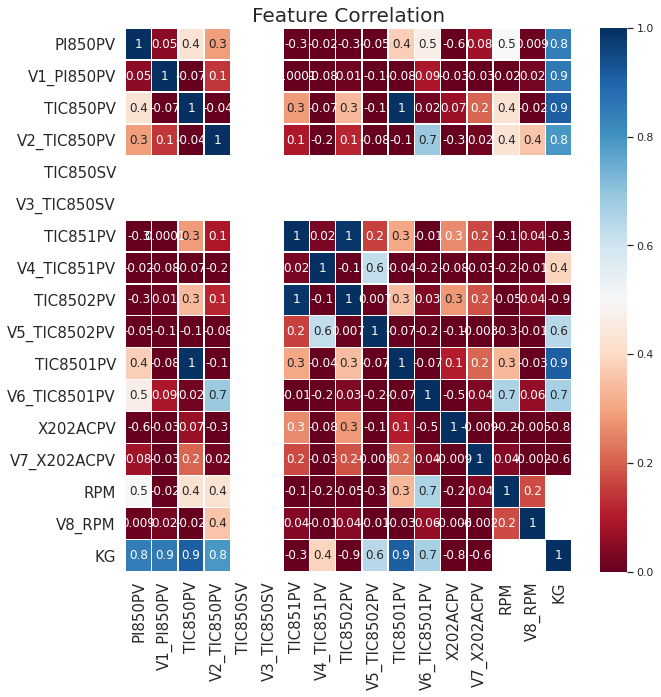

In [12]:
import seaborn as sns
def FeatureCorreate(datasets,dropData):#顏色越深（黑），相關係數越小，顏色越淺（白），相關係數越大
    sns.set(context="paper", font="monospace")
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10,10))
    train_corr = datasets.drop(dropData,axis=1).corr()

    #sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
    ax = sns.heatmap(train_corr,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g',linewidths=.5) #藍底示字
    #ax.set_xticklabels = sns.heatmap(train_corr.index, linewidths=5) #紅底無字
    ax.set_xticklabels(train_corr.index, size=15)
    ax.set_yticklabels(train_corr.index, size=15) #train_corr.columns[::-1], size=15  20201606
    ax.set_title('Feature Correlation', fontsize=20)
print("Train Features")
FeatureCorreate(data,'Time')

# 3.特徵工程,建模,訓練,預測

In [0]:
#定義預測與預測結果資料集
y = data['TIC850PV']
X = data.drop(labels=['Time','Stage','V1_PI850PV','V2_TIC850PV','V3_TIC850SV','V4_TIC851PV','V5_TIC8502PV','V6_TIC8501PV','V7_X202ACPV','V8_RPM','KG','RPM','TIC850PV'],axis=1) #KG variables remove 16.06

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PI850PV    1434 non-null   float64
 1   TIC850SV   1434 non-null   int64  
 2   TIC851PV   1434 non-null   float64
 3   TIC8502PV  1434 non-null   float64
 4   TIC8501PV  1434 non-null   float64
 5   X202ACPV   1434 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 67.3 KB


In [13]:
y.describe()

count    1434.000000
mean       38.832771
std        11.852682
min        21.921120
25%        29.891890
50%        32.886970
75%        48.435398
max        66.011700
Name: TIC850PV, dtype: float64

In [0]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
reg = SVR(kernel="rbf", C=1e3, gamma=0.1) #訓練模型
reg.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
X_test

,PI850PV,TIC850SV,TIC851PV,TIC8502PV,TIC8501PV,X202ACPV
370,2.625401,65,10.916440,12.317950,29.81934,80.32976
560,2.872639,65,10.842830,10.747480,30.89210,237.52600
1007,4.004998,65,8.389130,10.055760,48.19055,90.96001
589,2.899405,65,8.398460,9.698122,31.35110,237.40200
983,3.957068,65,8.217789,9.756349,45.40627,90.95284
...,...,...,...,...,...,...
464,2.721308,65,8.562287,10.060770,29.31991,232.22830
1364,-0.203092,65,50.027050,48.091500,26.26742,672.54770
1124,3.360601,65,63.822110,63.076590,52.03952,0.00000
925,3.736479,65,8.322104,9.330811,40.07896,90.89678


In [0]:
y_predict = reg.predict(X_test)

In [19]:
y_predict

array([35.73092009, 30.7866029 , 48.24273653, 31.19599077, 45.43417328,
       30.76395581, 31.80469486, 51.70896541, 35.24456737, 30.95936148,
       35.89550401, 37.90459734, 35.43893071, 54.26700224, 30.03789288,
       31.08634335, 61.26821615, 33.3926227 , 33.91307273, 32.86333911,
       33.673836  , 31.30261663, 54.64836589, 33.47048477, 29.33015054,
       47.68833911, 62.84107384, 37.9045969 , 38.32810095, 35.56315469,
       30.83366058, 40.16227806, 58.13486979, 35.41097413, 58.60914579,
       37.89150933, 34.10110373, 30.96527769, 33.71511388, 29.41408847,
       32.25877489, 51.92374316, 34.02209111, 36.66141244, 53.61795067,
       51.11974548, 32.40113449, 51.33978612, 51.32887781, 34.81529505,
       29.24844845, 59.84023089, 25.45557431, 47.17522032, 49.68318144,
       47.80057938, 52.59802103, 30.65624103, 44.36963843, 31.90674402,
       31.19355776, 31.6446326 , 53.22487773, 45.38913692, 31.57573493,
       31.17845067, 47.55986442, 35.76748093, 24.48487515, 50.26

# 4.評估與匯出

In [0]:
from sklearn.model_selection import cross_val_predict
lr = linear_model.LinearRegression()
predicted = cross_val_predict(lr, X, y, cv=10)


from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
#fig, ax = plt.subplots()

In [24]:
p = figure(plot_width=600, plot_height=400)

p.circle(y, predicted, fill_color="white", line_color="green", legend="predicted Tempture",size=4)
p.line([y.min(), y.max()], [y.min(), y.max()],line_color='firebrick', legend="regression",line_dash=[5,5],line_width=2)
p.legend.location = "top_left"
p.yaxis.axis_label = "Predicted Tempture"
p.xaxis.axis_label = "Measured Tempture"
show(p)

#plt.scatter(predicted,y,s=4)
#plt.scatter(predicted,y,s=0.1)

#plt.scatter(predicted,y,s=2)
#plt.scatter(y_predit, y_predit)                  

#plt.plot(y_predict,y_predict,'ro')

#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
#plt.xlabel('Predicted Tempture')
#plt.ylabel('Measured Tempture')

#plt.xlabel('Predicted')
#plt.ylabel('Measured')

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# print('R-squared value of RBF SVR is',reg.score(X_test,y_test)) # score=1為最理想情況 1- mean_squared_error(y_test,y_preditc)/ np.var(y_test)
#R2 Score
print('R2 score', r2_score(y_test, y_predict)) #R square
#平均絕對誤差
print('MAE', mean_absolute_error(y_test, y_predict)) # 想要知道資料中有沒有 outliers mae_test=np.sum(np.absolute(y_preditc-y_test))/len(y_test)
#平均方誤差
print('MSE', mean_squared_error(y_test, y_predict)) # 越小越準 mse_test=np.sum((y_preditc-y_test)**2)/len(y_test)

R2 score 0.8233210340821692
MAE 1.7975797894254255
MSE 24.801224081879084


In [25]:
from sklearn.externals import joblib
joblib.dump(reg,"./SVR.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['./SVR.pkl']

In [0]:
reg=joblib.load("./SVR.pkl")




